In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/Barcelona_Fotocasa_HousingPrices.csv')

# Variables numéricas

In [106]:
# Con .describe() conocemos diversos datos de interés como la mediana, la desviación típica y los percentiles de las variables numéricas
df[['price', 'rooms', 'bathroom', 'square_meters', 'square_meters_price']].describe()

,price,rooms,bathroom,square_meters,square_meters_price
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,1444.092574,2.420738,1.508793,84.610161,17.739121
std,1125.886215,1.138592,0.732798,47.874028,9.245241
min,320.000000,0.000000,1.000000,10.000000,4.910714
25%,875.000000,2.000000,1.000000,56.000000,12.790698
50%,1100.000000,2.000000,1.000000,73.000000,15.306122
75%,1540.000000,3.000000,2.000000,95.000000,19.444444
max,15000.000000,10.000000,8.000000,679.000000,186.666667


## Histogramas

<Axes: >

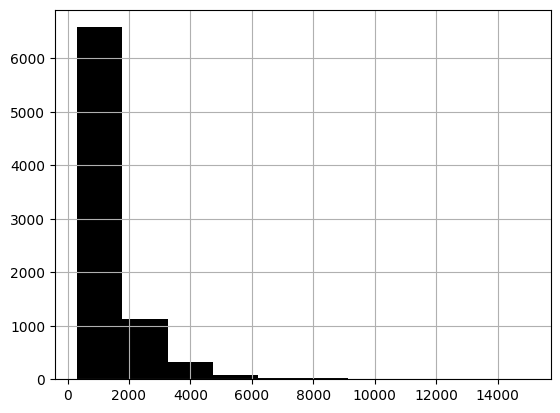

In [53]:
# Vamos a crear histogramas para visualizar mejor estos datos en cada una de las columnas
df['price'].hist(color='black')

En el grafico de arriba podemos observar que abundan las viviendas entre 0€ y 1800€, que hay unas pocas mas de 1000 entre 1800-3000€ y a partir de ahí disminuye muchísimo la cantidad de viviendas

<Axes: >

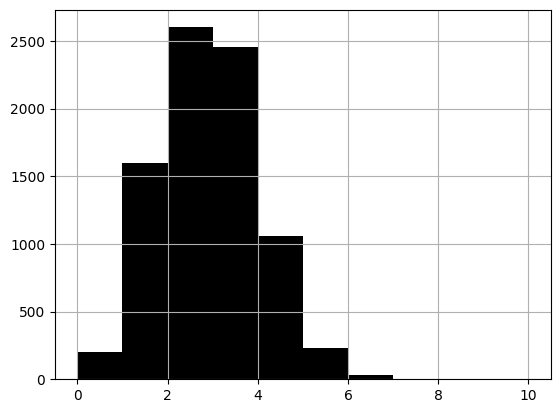

In [105]:
df['rooms'].hist(color='black')

En el gráfico de arriba podemos observar que la mayoría de viviendas tiene 2 o 3 habitaciones, veámoslo en porcentajes:

In [107]:
print(f"{(df['rooms'].value_counts(normalize=True) * 100).round(2)}")

rooms
2     31.77
3     30.00
1     19.49
4     12.96
5      2.83
0      2.49
6      0.34
7      0.06
10     0.04
9      0.02
Name: proportion, dtype: float64


<Axes: >

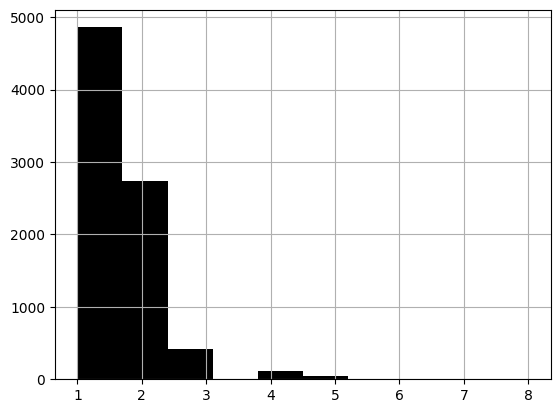

In [55]:
df['bathroom'].hist(color='black')

En el gráfico de arriba podemos observar que la gran mayoría de viviendas tiene 1 solo baño, veámoslo en porcentajes:

In [110]:
print(f"{(df['bathroom'].value_counts(normalize=True) * 100).round(2)}")

bathroom
1    59.34
2    33.41
3     5.12
4     1.48
5     0.50
6     0.11
8     0.02
7     0.01
Name: proportion, dtype: float64


<Axes: >

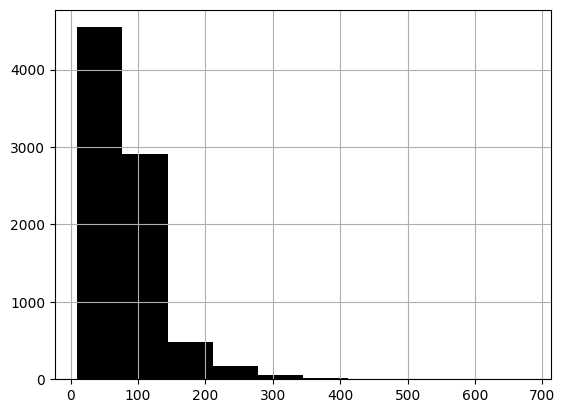

In [111]:
df['square_meters'].hist(color='black')

<Axes: >

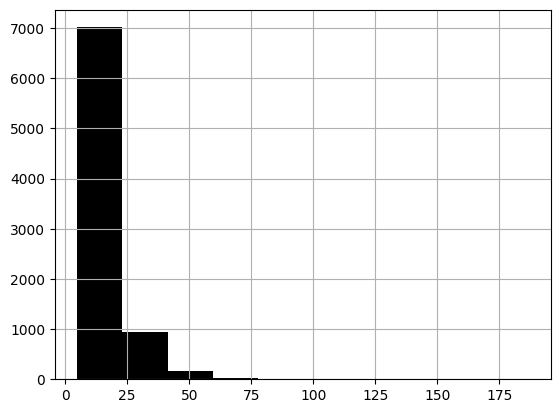

In [57]:
df['square_meters_price'].hist(color='black')

# Variables categóricas

Para las variables categóricas, nos viene bien contar cuantos valores hay en cada variable

In [ ]:
df['neighborhood'].value_counts()

neighborhood
Eixample               2401
Sarria-Sant Gervasi    1396
Ciutat Vella           1365
Gràcia                  688
Sant Martí              617
Sants-Montjuïc          590
Les Corts               524
Horta- Guinardo         315
Sant Andreu             178
Nou Barris              114
Name: count, dtype: int64

In [29]:
df['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64

### Tratamiento de valores nulos en real_state

In [59]:
df.isnull().sum()

Unnamed: 0               0
price                    0
rooms                    0
bathroom                 0
lift                     0
terrace                  0
square_meters            0
real_state             268
neighborhood             0
square_meters_price      0
dtype: int64

In [60]:
df['real_state'].fillna('Unknown', inplace=True)

### Graficos de barras

<Axes: title={'center': 'Tipo de vivienda'}, xlabel='real_state'>

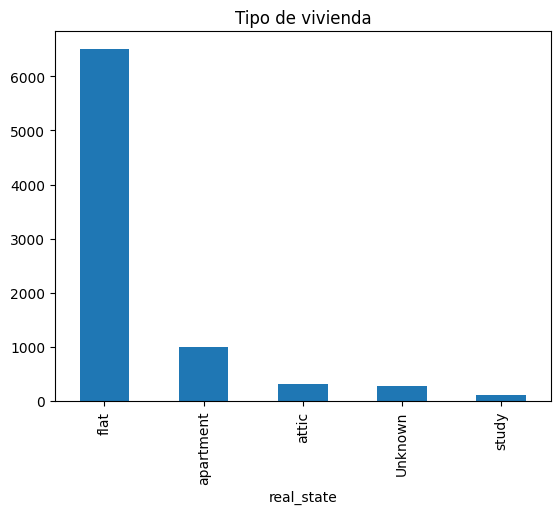

In [64]:
df['real_state'].value_counts().plot(kind='bar', title='Tipo de vivienda')

<Axes: title={'center': 'Barrio'}, xlabel='neighborhood'>

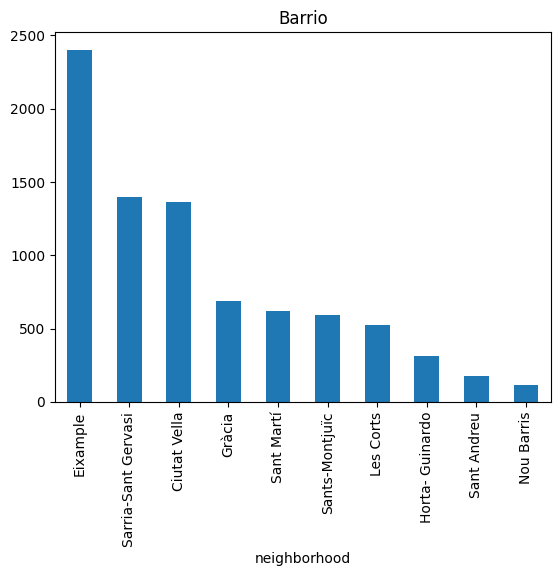

In [63]:
df['neighborhood'].value_counts().plot(kind='bar', title='Barrio')

### Porcentajes

Veamos en porcentajes la cantidad de viviendas por tipo y por barrio

In [85]:
print(f"{(df['real_state'].value_counts(normalize=True) * 100).round(2)}")

real_state
flat         79.45
apartment    12.10
attic         3.85
Unknown       3.27
study         1.33
Name: proportion, dtype: float64


In [87]:
print(f"{(df['neighborhood'].value_counts(normalize=True) * 100).round(2)}")

neighborhood
Eixample               29.32
Sarria-Sant Gervasi    17.05
Ciutat Vella           16.67
Gràcia                  8.40
Sant Martí              7.54
Sants-Montjuïc          7.21
Les Corts               6.40
Horta- Guinardo         3.85
Sant Andreu             2.17
Nou Barris              1.39
Name: proportion, dtype: float64


# Variables Booleanas

Veamos cuantas viviendas tienen ascensor y cuantas viviendas tienen terraza

In [88]:
df.lift.value_counts()

lift
True     5710
False    2478
Name: count, dtype: int64

In [90]:
df.terrace.value_counts()

terrace
False    6518
True     1670
Name: count, dtype: int64

Ahora veámoslo en porcentaje

In [93]:
print(f"{(df['lift'].value_counts(normalize=True) * 100).round(2)}")

lift
True     69.74
False    30.26
Name: proportion, dtype: float64


In [92]:
print(f"{(df['terrace'].value_counts(normalize=True) * 100).round(2)}")

terrace
False    79.6
True     20.4
Name: proportion, dtype: float64


Y ahora en graficos de barras

<Axes: title={'center': 'Ascensor'}, xlabel='lift'>

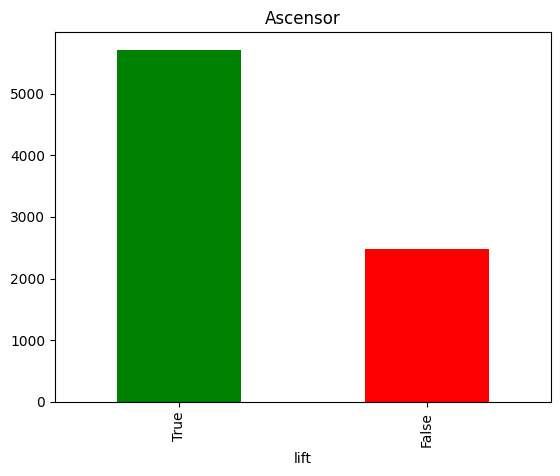

In [101]:
df['lift'].value_counts().plot(kind='bar', color=['green', 'red'], title='Ascensor')

<Axes: title={'center': 'Terraza'}, xlabel='terrace'>

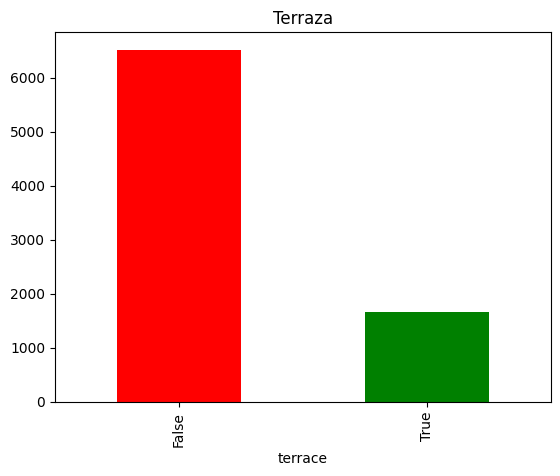

In [102]:
df['terrace'].value_counts().plot(kind='bar', color=['red', 'green'], title='Terraza')